# Example 1 :
Handwritten digit recognition example using adaboost model and default decision tree base classifer

Three key parameter of AdaBoostClassifier:
-base_estimator: a weak learner used to train the model. gain from default DecisionTreeClassifier. can also specify different machine learning algorithms( svc for example 2)

-n_estimators: # of weak learners to train iteratively.

-learning_rate: It contributes to the weights of weak learners. default value =1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import learning_curve

from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

(1797, 64)


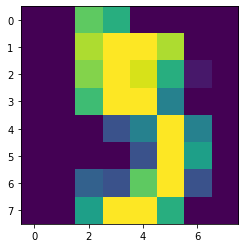

In [2]:
digits = load_digits()
print(digits.data.shape)
# plt.gray() 
plt.imshow(digits.images[5].reshape(8,8)) 
plt.show() 

In [3]:
X = digits.data
y = digits.target

In [4]:
score = []
for depth in [1,2,10, 12] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth)) # use default DecisionTreeCliassifer
    scores_ada = cross_val_score(reg_ada, X, y, cv=3) # cross-validation = 3 
    print(scores_ada)
    score.append(scores_ada.mean())

[0.24916944 0.27045075 0.26677852]
[0.48172757 0.56928214 0.34899329]
[0.92857143 0.96327212 0.93288591]
[0.8089701  0.87145242 0.83724832]


In [5]:
print(score) # max occurs on max_depth=10, larger depth could cause overfitting. 

[0.2621329033193222, 0.4666676667454197, 0.9415764849373436, 0.8392236141721979]


# Example 2 : IRIS case

In [6]:
iris =load_iris()
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
#create the AdaBoost Model using Scikit-learn. AdaBoost uses C-Support Vector Classifier.
svc=SVC(probability=True, kernel='linear') 

abc = AdaBoostClassifier(n_estimators=50,
                         base_estimator=svc, # specify the ML algrothm as SVC
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
# print("Accuracy:",accuracy_score(y_test, y_pred))

print("Accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))


Accuracy: 93.33%


ref:
https://towardsdatascience.com/boosting-and-adaboost-clearly-explained-856e21152d3e
https://www.datacamp.com/community/tutorials/adaboost-classifier-python